<a href="https://colab.research.google.com/github/Nellaapriliaa/MachineLearningTasks/blob/main/TUGAS%206/Nella_Aprilia_1103210185_Mall_Customers_K_Means_Clustering_pada_GColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Nella Aprilia

NIM: 1103210185

TUGAS 6: Mall_Customers_K-Means Clustering pada GColab

Dokumentasi ChatGPT : https://chat.openai.com/share/c4662d30-80ca-4d71-93d1-19e32c791c04

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

1. Memuat Data Mall_Customers dari Google Drive

In [92]:
# @title EXPLORATORY DATA ANALYSIS
# Tentukan path dari dataset
file_path = ('/content/drive/MyDrive/Dataset/Mall_Customers.csv')

# Baca dataset sebagai dataframe
df = pd.read_csv(file_path)

# Tampilkan dataframe
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [82]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [83]:
# Menghapus fitur CustomerID
df.drop(columns=['CustomerID'], inplace=True)

# Menampilkan informasi setelah penghapusan
print("\nInformasi setelah penghapusan:")
df.info()



Informasi setelah penghapusan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [84]:
# Mengubah nama kolom 'Genre' menjadi 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Menampilkan DataFrame setelah perubahan nama kolom
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [85]:
# Konversi variabel kategorikal 'Gender' menjadi numerik
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

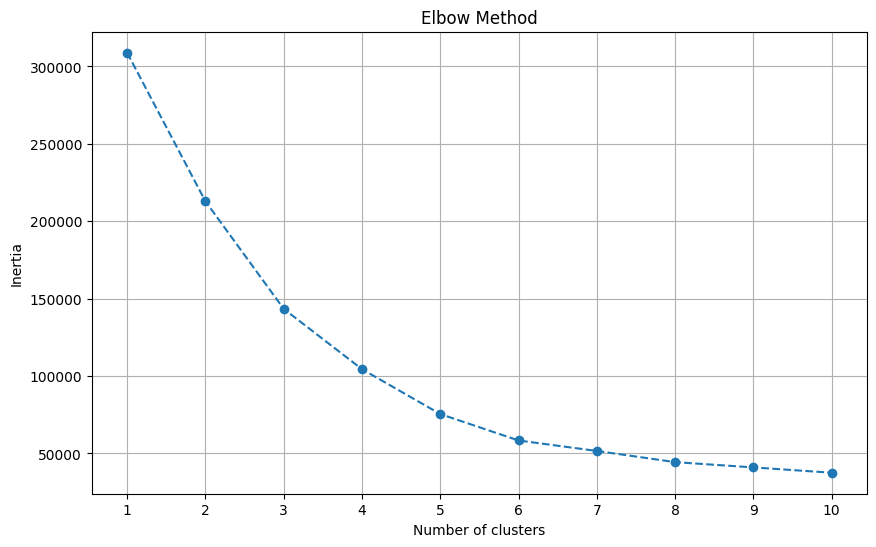

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menghitung inersia untuk jumlah klaster 1 hingga 10
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [87]:
# Inisialisasi dan pelatihan model K-Means dengan 5 klaster
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

# Menambahkan label klaster ke dalam dataframe
df['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,1
1,0,21,15,81,4
2,1,20,16,6,1
3,1,23,16,77,4
4,1,31,17,40,1
...,...,...,...,...,...
195,1,35,120,79,3
196,1,45,126,28,2
197,0,32,126,74,3
198,0,32,137,18,2


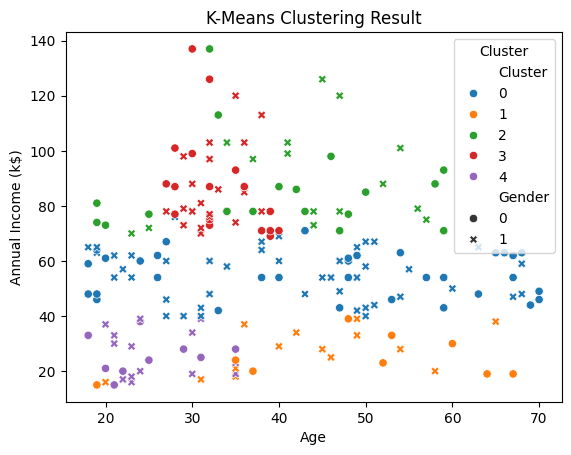

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatter plot untuk Age dan Annual Income (k$), menggunakan Gender sebagai warna
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Cluster', style='Gender', palette='tab10')
plt.title('K-Means Clustering Result')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.show()


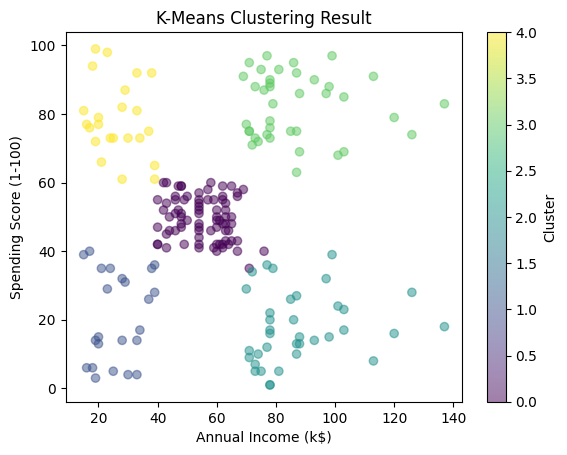

In [89]:
import matplotlib.pyplot as plt

# Plot scatter plot untuk Annual Income (k$) dan Spending Score (1-100), menggunakan Gender sebagai warna
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering Result')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


In [90]:
# @title EVALUATING
from sklearn.metrics import silhouette_score

# Evaluasi inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Inertia: 75399.61541401484
Silhouette Score: 0.4452804450206482
